In [2]:
import dlib
import cv2
import os
import re
import json

Repo: https://github.com/xinyooo/deepfake-detection

Dataset: https://www.kaggle.com/c/deepfake-detection-challenge/data

In [ ]:
train_frame_folder = 'train_sample_videos'
with open(os.path.join(train_frame_folder, 'metadata.json'), 'r') as file:
    data = json.load(file)    
list_of_train_data = [f for f in os.listdir(
    train_frame_folder) if f.endswith('.mp4')]
detector = dlib.get_frontal_face_detector()

for vid in list_of_train_data:

    count = 0
    # Video capturing constructor.
    cap = cv2.VideoCapture(os.path.join(train_frame_folder, vid))

    # (CAP_PROP_FPS) Returns frame rate of the video (#frames / second).
    frameRate = cap.get(5)
    while cap.isOpened():  # Returns true if video capturing has been initialized already.

        # (CAP_PROP_POS_MSEC) Current position of the video file in milliseconds or video capture timestamp.
        frameId = cap.get(1)
        ret, frame = cap.read()  # The methods/functions combine VideoCapture::grab and VideoCapture::retrieve in one call. This is the most convenient method for reading video files or capturing data from decode and return the just grabbed frame. If no frames has been grabbed (camera has been disconnected, or there are no more frames in video file), the methods return false and the functions return NULL pointer.
        if ret != True:
            break

        # Takes only one frame per second.
        if frameId % ((int(frameRate)+1)*1) == 0:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()

                crop_img = frame[y1:y2, x1:x2]
                h, w, channels = crop_img.shape
                half = h//2
                top = crop_img[:half, :]
                bottom = crop_img[half:, :]

                if data[vid]['label'] == 'REAL':
                    cv2.imwrite('dataset/real/'+vid.split('.')
                                [0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                    cv2.imwrite('dataset/real/'+vid.split('.')
                                [0]+'_'+str(count)+'top'+'.png', cv2.resize(top, (128, 128)))
                    cv2.imwrite('dataset/real/'+vid.split('.')
                                [0]+'_'+str(count)+'bottom'+'.png', cv2.resize(bottom, (128, 128)))
                elif data[vid]['label'] == 'FAKE':
                    cv2.imwrite('dataset/fake/'+vid.split('.')
                                [0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                    cv2.imwrite('dataset/fake/'+vid.split('.')
                                [0]+'_'+str(count)+'top'+'.png', cv2.resize(top, (128, 128)))
                    cv2.imwrite('dataset/fake/'+vid.split('.')
                                [0]+'_'+str(count)+'bottom'+'.png', cv2.resize(bottom, (128, 128)))
                count += 1


In [3]:
detector = dlib.get_frontal_face_detector()
vid = "002.mp4"
count = 0
# Video capturing constructor.
cap = cv2.VideoCapture(os.path.join(vid))

# (CAP_PROP_FPS) Returns frame rate of the video (#frames / second).
frameRate = cap.get(5)
while cap.isOpened():  # Returns true if video capturing has been initialized already.

    # (CAP_PROP_POS_MSEC) Current position of the video file in milliseconds or video capture timestamp.
    frameId = cap.get(1)
    ret, frame = cap.read()  # The methods/functions combine VideoCapture::grab and VideoCapture::retrieve in one call. This is the most convenient method for reading video files or capturing data from decode and return the just grabbed frame. If no frames has been grabbed (camera has been disconnected, or there are no more frames in video file), the methods return false and the functions return NULL pointer.
    if ret != True:
        break

    # Takes only one frame per second.
    if frameId % ((int(frameRate)+1)*1) == 0:
        face_rects, scores, idx = detector.run(frame, 0)
        for i, d in enumerate(face_rects):
            x1 = d.left()
            y1 = d.top()
            x2 = d.right()
            y2 = d.bottom()

            crop_img = frame[y1:y2, x1:x2]
            h, w, channels = crop_img.shape
            half = h//2
            top = crop_img[:half, :]
            bottom = crop_img[half:, :]

            if True:
                cv2.imwrite('dataset/real/full/'+vid.split('.')
                            [0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                cv2.imwrite('dataset/real/top/'+vid.split('.')
                            [0]+'_'+str(count)+'top'+'.png', cv2.resize(top, (128, 128)))
                cv2.imwrite('dataset/real/bottom/'+vid.split('.')
                            [0]+'_'+str(count)+'bottom'+'.png', cv2.resize(bottom, (128, 128)))
            elif data[vid]['label'] == 'FAKE':
                cv2.imwrite('dataset/fake/'+vid.split('.')
                            [0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                cv2.imwrite('dataset/fake/'+vid.split('.')
                            [0]+'_'+str(count)+'top'+'.png', cv2.resize(top, (128, 128)))
                cv2.imwrite('dataset/fake/'+vid.split('.')
                            [0]+'_'+str(count)+'bottom'+'.png', cv2.resize(bottom, (128, 128)))
            count += 1


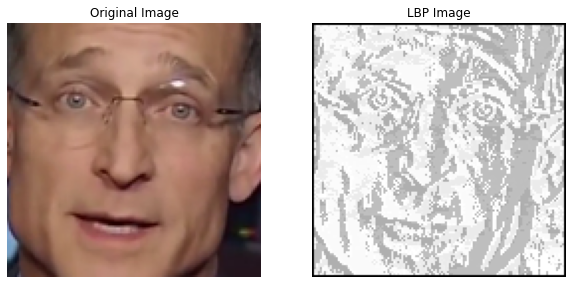

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_lbp(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Set the parameters for LBP computation
    radius = 1
    neighbors = 8
    
    # Apply LBP to the grayscale image
    lbp = np.zeros_like(gray)
    rows, cols = gray.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            center = gray[i, j]
            code = 0
            power = 1
            for k in range(neighbors):
                x = i + int(radius * np.cos(2 * np.pi * k / neighbors))
                y = j - int(radius * np.sin(2 * np.pi * k / neighbors))
                if gray[x, y] >= center:
                    code += power
                power *= 2
            lbp[i, j] = code
    
    return lbp

# Load an image
image = cv2.imread('dataset/real/full/002_1.png')

# Apply LBP on the image
lbp_image = apply_lbp(image)

# Display original and LBP images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(lbp_image, cmap='gray')
axes[1].set_title('LBP Image')
axes[1].axis('off')
plt.show()